In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

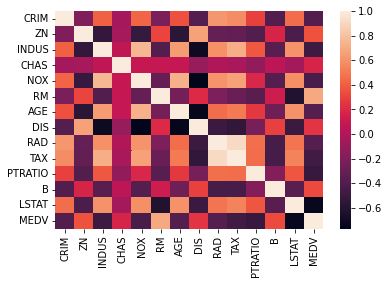

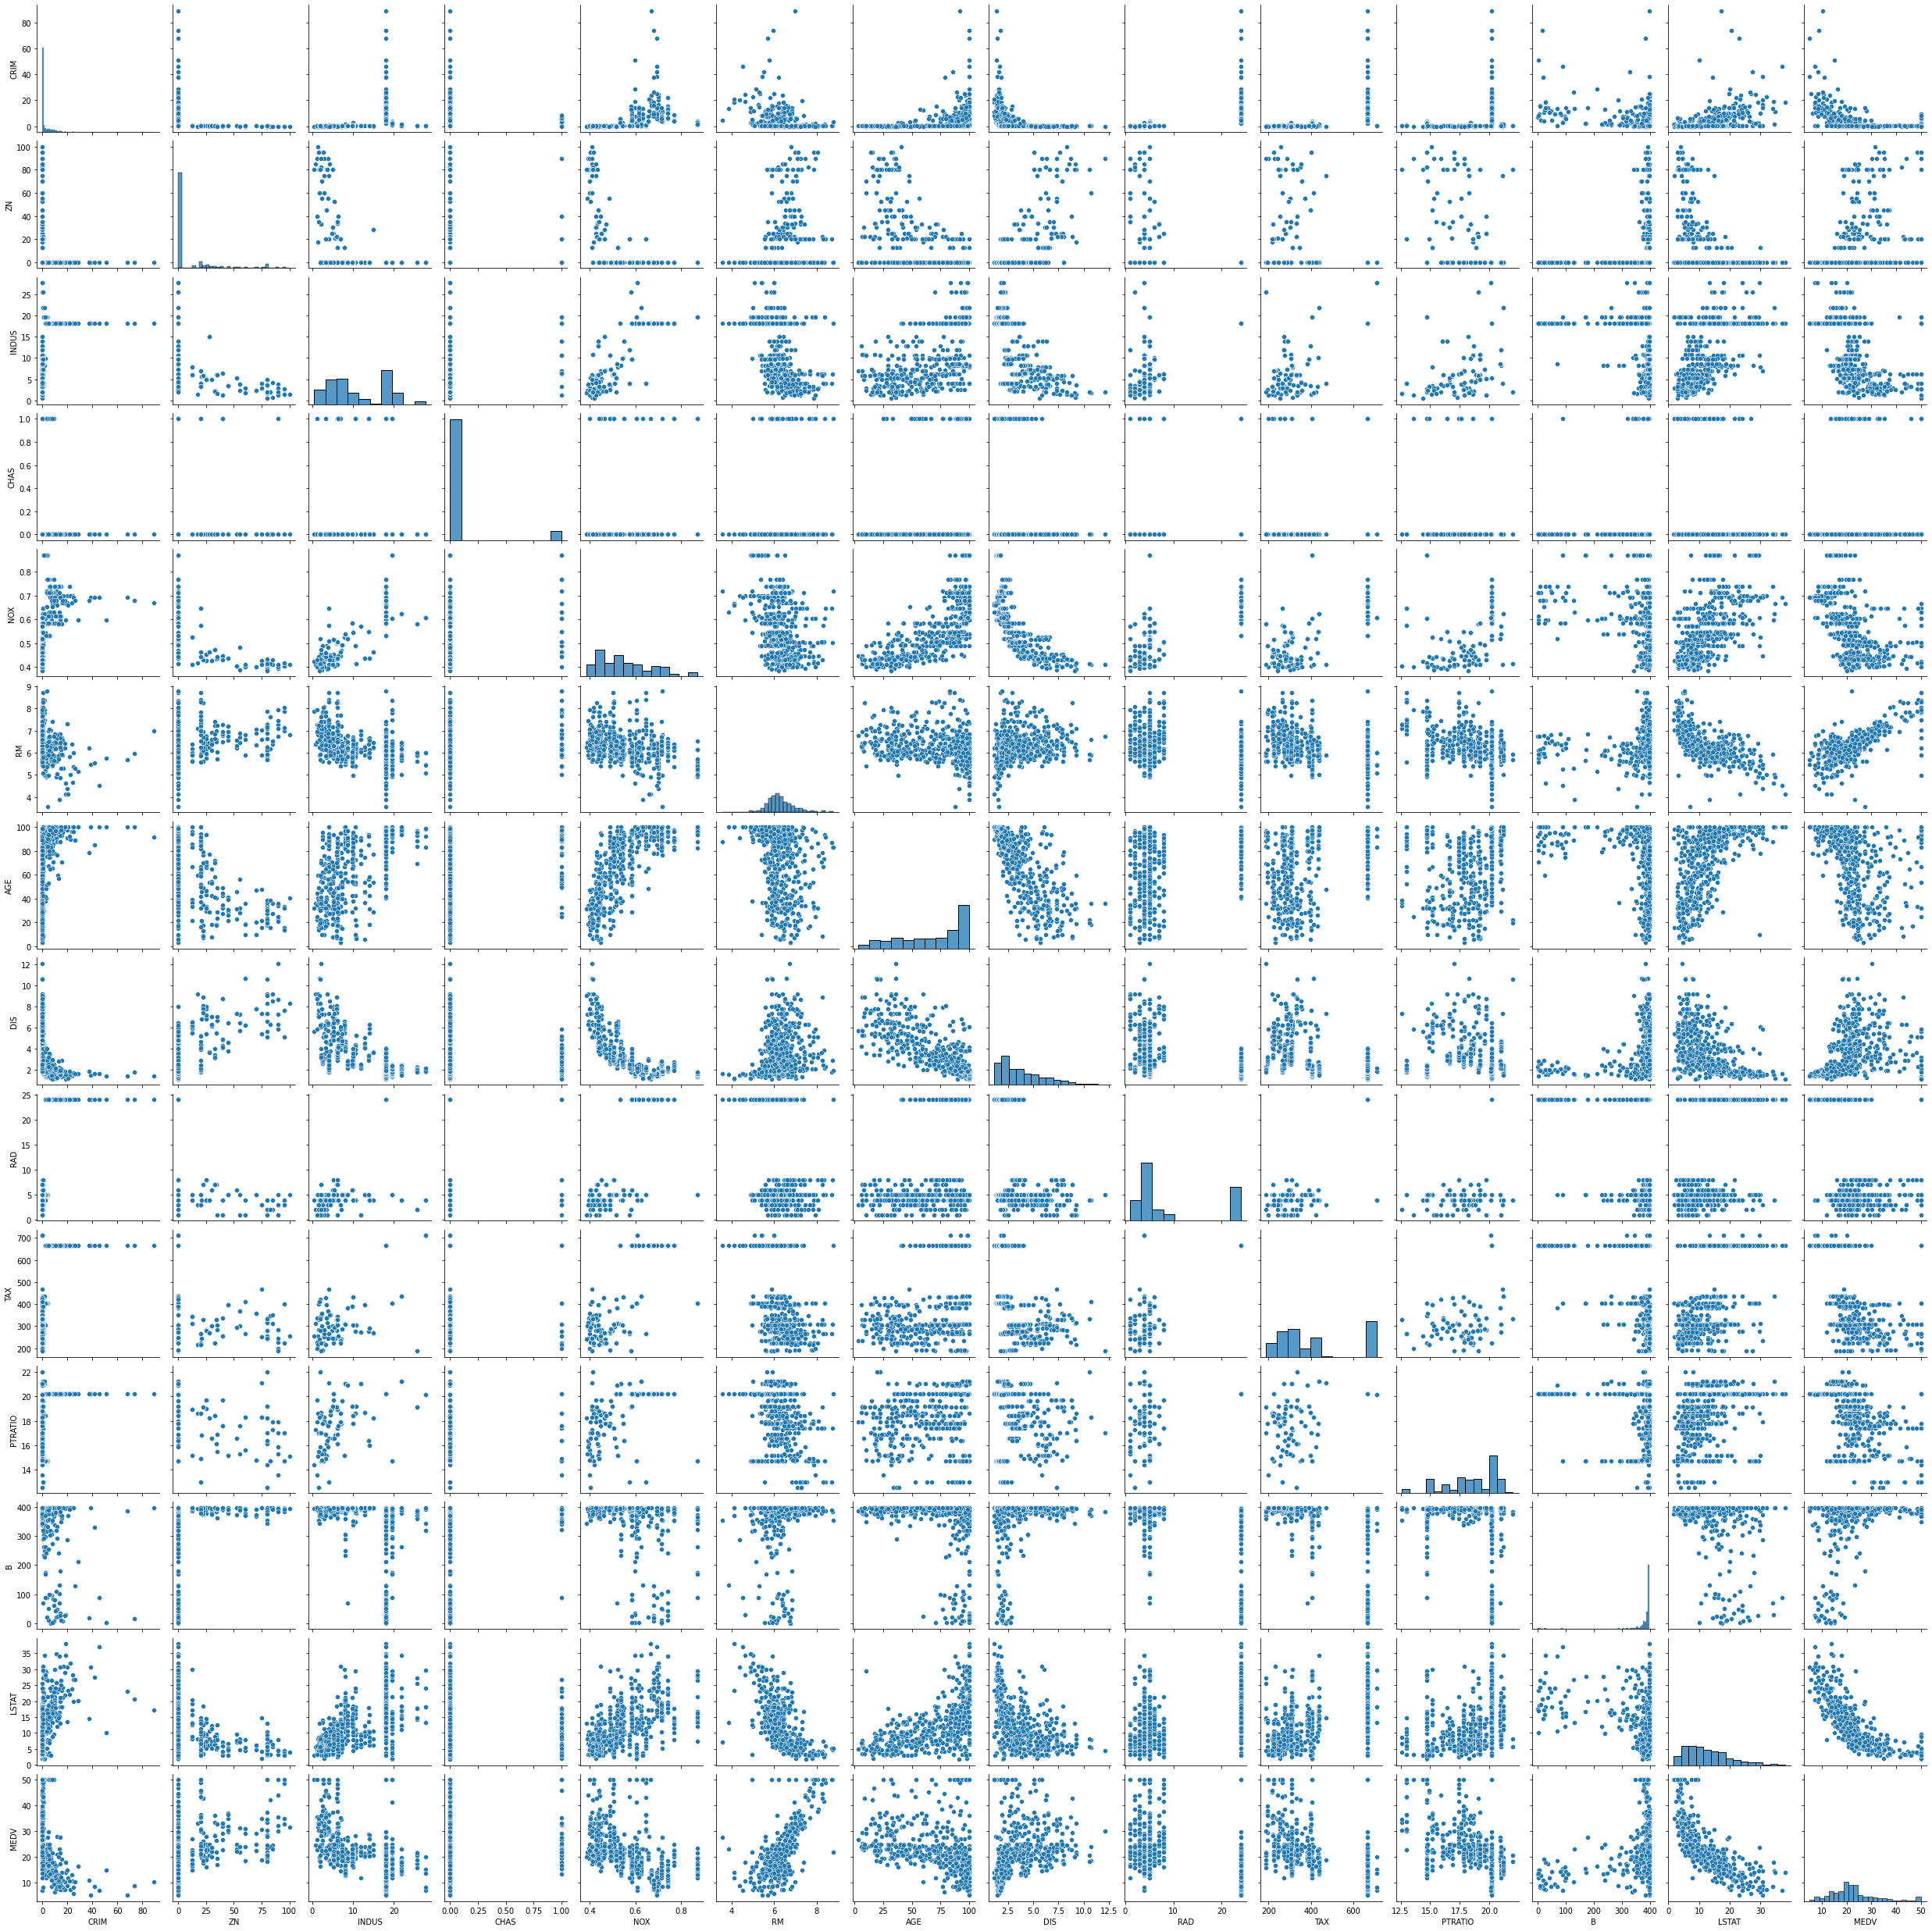

In [ ]:
df = pd.read_csv('housing.data', sep=r"\s+")
df.columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV'
]
# 'ZN', 'INDUS', 'RM', 'LSTAT', 'B', 'TAX'
# we will use these features because they look good
# result: using all then trying to drop fearture by feature is better
# we find that RAD doesnt affect the data before
# TAX definite affect the result one way or another
sns.heatmap(df.corr())
sns.pairplot(df)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

train_dataset = df.sample(frac=0.9, random_state=0)
test_dataset = df.drop(train_dataset.index)
# we tried to be smart and select only some feature
# but apparently for NN, it's just better to have all features.
# train_features = train_dataset[['ZN', 'INDUS', 'RM', 'LSTAT', 'B', 'TAX']]
# test_features = test_dataset[['ZN', 'INDUS', 'RM', 'LSTAT', 'B', 'TAX']]
train_features = train_dataset.drop(['MEDV', 'RAD'], axis=1)
test_features = test_dataset.drop(['MEDV', 'RAD'], axis=1)

train_labels = train_dataset[['MEDV']]
test_labels = test_dataset[['MEDV']]
normalizer = tf.keras.layers.Normalization(axis=-1)



In [ ]:
dnn_model = build_and_compile_model(normalizer)

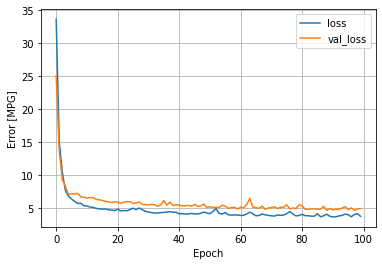

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)


In [ ]:
print(history.history['val_loss'][-1])
#

4.94586706161499


51 51
[15.  16.6 34.9 14.4 21.7 23.4 23.6 28.7 27.5 21.2 20.4 17.8 50.  23.6
 29.4 29.9 50.  31.1 29.1 33.3 34.6 22.4 23.7 17.6 29.6 30.7 29.1 20.1
 24.8 23.9 16.2 25.  20.7 19.5 20.6 19.  25.   8.5  6.3  5.  11.7 16.1
 13.  13.4 19.5 19.9 23.2 29.8 16.7  7.  20.1] [18.08314   20.033827  36.21077   19.772858  23.6541    24.147709
 27.933002  28.350845  24.394127  21.957378  15.886201  13.294042
 27.4183    25.07064   27.299381  26.005013  32.711597  32.852013
 28.970625  25.348854  24.135118  23.10701   24.51768   20.720314
 26.083206  23.910816  30.878405  24.650488  21.889286  23.487808
 23.069471  26.520803  27.329498  27.628872  27.60802   27.714306
 23.474886  16.034088  10.501008   9.944989   6.7993894 13.916215
 18.760357  12.031392  19.781933  19.89068   20.366375  21.841831
 17.652613  19.917036  24.86145  ]
tf.Tensor(0.5282868465169459, shape=(), dtype=float64)


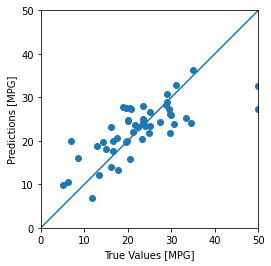

In [ ]:
from keras import backend as K
import numpy as np
def coeff_determination(y_true, y_pred):
    print(y_true, y_pred)
    SS_res =  K.sum(K.square( y_true-y_pred ))
    # print(K.mean(y_true))
    SS_tot = K.sum(K.square( y_true - np.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
print(len(test_labels), len(test_predictions))
print(coeff_determination(test_labels.to_numpy().flatten(), test_predictions))